<a href="https://colab.research.google.com/github/shailu1999/Traffic_Signs_Classification/blob/master/Traffic_signs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip "/content/drive/My Drive/Classify_Traffic_signs.zip"

In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them.
The dataset contains 43 different classes of images.
Classes are as listed below:
1. ( 0, b'Speed limit (20km/h)')
2. ( 1, b'Speed limit (30km/h)')
3. ( 2, b'Speed limit (50km/h)') 
4. ( 3, b'Speed limit (60km/h)')
5. (4, b'Speed limit (70km/h)') 
6. ( 5, b'Speed limit (80km/h)')
7. ( 6, b'End of speed limit (80km/h)') 
8. ( 7, b'Speed limit (100km/h)')
9. ( 8, b'Speed limit (120km/h)')
10. ( 9, b'No passing')
11. (10, b'No passing for vehicles over 3.5 metric tons')
12. (11, b'Right-of-way at the next intersection')
13. (12, b'Priority road')
14. (13, b'Yield') 
15. (14, b'Stop') 
16. (15, b'No vehicles')
17. (16, b'Vehicles over 3.5 metric tons prohibited')
18.  (17, b'No entry')
19. (18, b'General caution')
20.  (19, b'Dangerous curve to the left')
21. (20, b'Dangerous curve to the right')
22. (21, b'Double curve')
23. (22, b'Bumpy road')
24. (23, b'Slippery road')
25. (24, b'Road narrows on the right')
26. (25, b'Road work')
27. (26, b'Traffic signals')
28. (27, b'Pedestrians')
29. (28, b'Children crossing')
30. (29, b'Bicycles crossing')
31. (30, b'Beware of ice/snow')
32. (31, b'Wild animals crossing')
33. (32, b'End of all speed and passing limits')
34. (33, b'Turn right ahead')
35. (34, b'Turn left ahead') 
36. (35, b'Ahead only')
37. (36, b'Go straight or right')
38. (37, b'Go straight or left')
39. (38, b'Keep right')
40. (39, b'Keep left')
41. (40, b'Roundabout mandatory')
42.  (41, b'End of no passing')
42. (42, b'End of no passing by vehicles over 3.5 metric tons')

In [0]:
#German Dataset
#43 different classes of images
#images are of 32x32 pixels
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
import PIL
from tensorflow.keras import layers
import pickle


In [0]:
with open('/content/traffic-signs-data/train.p',mode='rb') as training_data:
  train=pickle.load(training_data)
with open('/content/traffic-signs-data/test.p',mode='rb') as testing_data:
  test=pickle.load(testing_data)
with open('/content/traffic-signs-data/valid.p',mode='rb') as validation_data:
  validation=pickle.load(validation_data)

In [0]:
X_train, y_train=train['features'],train['labels']
X_test,y_test=test['features'], test['labels']
X_valid, y_valid=validation['features'],validation['labels']

In [6]:


X_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

1

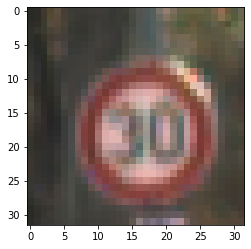

In [8]:
i=3100
plt.imshow(X_train[i])
y_train[i]
#class 1 is 30km/hr. Checked for training data

7

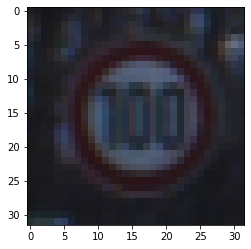

In [9]:
i=3020
plt.imshow(X_valid[i])
y_valid[i]

29

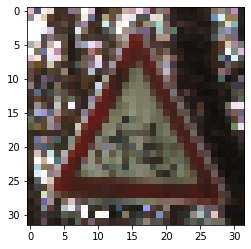

In [10]:

i=2100
plt.imshow(X_test[i])
y_test[i]

In [0]:
from sklearn.utils import shuffle
X_train, y_train=shuffle(X_train, y_train)

In [0]:
#We are going to obtain the avg of the pixels in each case. By doing so, We'll get the extreme gray.
#We are just converting the colored pics to grayscale images
X_train_gray=np.sum(X_train/3,axis=3, keepdims=True)
X_test_gray=np.sum(X_test/3,axis=3, keepdims=True)
X_validation_gray=np.sum(X_valid/3,axis=3, keepdims=True)

In [13]:
X_train_gray.shape

(34799, 32, 32, 1)

In [14]:

X_test_gray.shape

(12630, 32, 32, 1)

In [15]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [0]:
#Normalizing the data
X_train_gray_norm=(X_train_gray-128)/128
X_test_gray_norm=(X_test_gray-128)/128
X_validation_gray_norm=(X_validation_gray-128)/128

In [17]:
X_train_gray_norm
#We'll be seeing numbers which are basically not in the range from 0 to 255

array([[[[ 0.07291667],
         [ 0.07291667],
         [-0.29427083],
         ...,
         [-0.671875  ],
         [-0.39583333],
         [-0.15625   ]],

        [[-0.01302083],
         [-0.15885417],
         [-0.34114583],
         ...,
         [-0.71354167],
         [-0.6015625 ],
         [-0.3515625 ]],

        [[-0.24739583],
         [-0.34635417],
         [-0.46614583],
         ...,
         [-0.74479167],
         [-0.7265625 ],
         [-0.55989583]],

        ...,

        [[-0.57291667],
         [-0.59114583],
         [-0.48697917],
         ...,
         [ 0.421875  ],
         [ 0.40625   ],
         [ 0.5078125 ]],

        [[-0.56510417],
         [-0.57552083],
         [-0.5390625 ],
         ...,
         [ 0.47395833],
         [ 0.53125   ],
         [ 0.44270833]],

        [[-0.671875  ],
         [-0.67447917],
         [-0.6796875 ],
         ...,
         [ 0.671875  ],
         [ 0.49479167],
         [ 0.30989583]]],


       [[[ 0.9921875 ],


<Figure size 432x288 with 0 Axes>

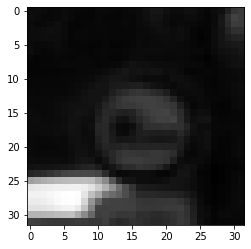

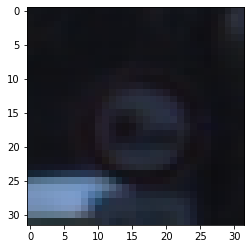

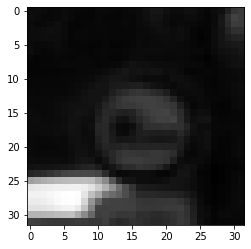

<Figure size 432x288 with 0 Axes>

In [18]:
i=610
plt.imshow(X_train_gray[i].squeeze(), cmap="gray") #Grayscale image
plt.figure()
plt.imshow(X_train[i])#Orig image 
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(),cmap='gray') #Normalized version of the image
plt.figure()

<Figure size 432x288 with 0 Axes>

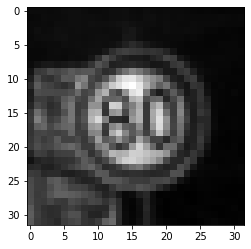

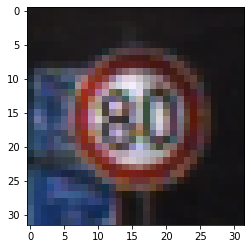

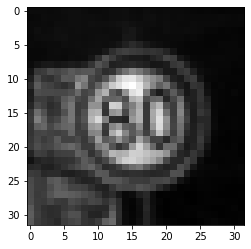

<Figure size 432x288 with 0 Axes>

In [19]:
i=30
plt.imshow(X_test_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(),cmap='gray')
plt.figure()

<Figure size 432x288 with 0 Axes>

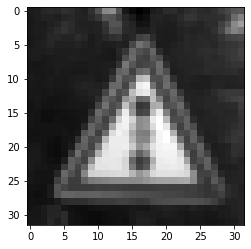

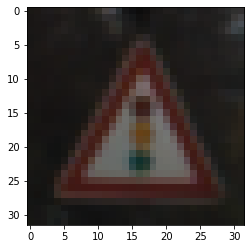

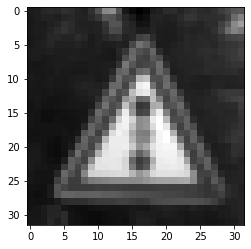

<Figure size 432x288 with 0 Axes>

In [20]:
i=200
plt.imshow(X_validation_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_valid[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(),cmap='gray')
plt.figure()

In [21]:
#IMPLEMENTING LENET ARCHITECTURE
from tensorflow.keras import layers, models, datasets

lenet = models.Sequential()

#First Convolution Layer
lenet.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)))#6 filters of 5x5 are being used here and with an input shape of 32x32x1
lenet.add(layers.AveragePooling2D())

#Second Convolution Layer
lenet.add(layers.Conv2D(16, (5,5),activation='relu'))#16 filters of 5x5 dimensions
lenet.add(layers.AveragePooling2D())

#Flattening the Network
lenet.add(layers.Flatten())

#Fully connected layer
lenet.add(layers.Dense(120, activation='relu'))#120 neurons

#Fully Connected Layer
lenet.add(layers.Dense(84, activation='relu'))#84 neurons

#Fully Conncted Layer(Final layer)
lenet.add(layers.Dense(43, activation='softmax'))#43 neurons. Softmax is being used as we'll getting different probabllities and we'll be picking max of them
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [0]:
lenet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
history=lenet.fit(X_train_gray_norm, y_train, batch_size=500, epochs=50, verbose=1, validation_data=(X_validation_gray_norm, y_valid))

Epoch 1/50
70/70 [==============================] - 1s 12ms/step - loss: 0.0372 - accuracy: 0.9892 - val_loss: 0.8105 - val_accuracy: 0.8361
Epoch 2/50
70/70 [==============================] - 1s 10ms/step - loss: 0.0308 - accuracy: 0.9920 - val_loss: 0.8649 - val_accuracy: 0.8397
Epoch 3/50
70/70 [==============================] - 1s 10ms/step - loss: 0.0278 - accuracy: 0.9926 - val_loss: 0.9489 - val_accuracy: 0.8367
Epoch 4/50
70/70 [==============================] - 1s 10ms/step - loss: 0.0258 - accuracy: 0.9927 - val_loss: 0.8834 - val_accuracy: 0.8492
Epoch 5/50
70/70 [==============================] - 1s 10ms/step - loss: 0.0190 - accuracy: 0.9958 - val_loss: 0.9174 - val_accuracy: 0.8399
Epoch 6/50
70/70 [==============================] - 1s 10ms/step - loss: 0.0198 - accuracy: 0.9948 - val_loss: 0.9003 - val_accuracy: 0.8392
Epoch 7/50
70/70 [==============================] - 1s 10ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 1.0040 - val_accuracy: 0.8388
Epoch 8/50
70

In [33]:
score=lenet.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 1.5975 - accuracy: 0.8717
Test Accuracy: 0.8716548085212708


In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
accuracy= history.history['accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']
#To see how the model is progressing throughout the training

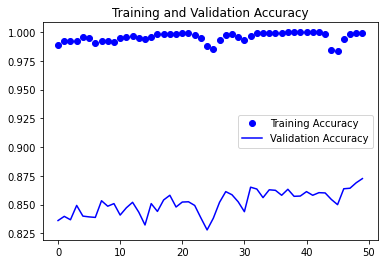

In [36]:

#Actual performance of the model during the training
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


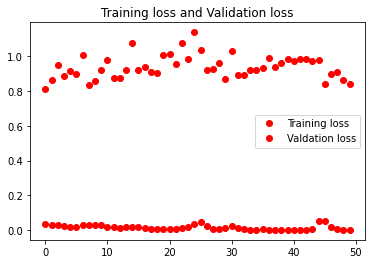

In [37]:
#Visualizing the loss
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Valdation loss')
plt.title('Training loss and Validation loss')
plt.legend()

In [0]:
prediction_classes=lenet.predict_classes(X_test_gray_norm)
y_true=y_test
#By doing so, we'll be able to obtain the predict class

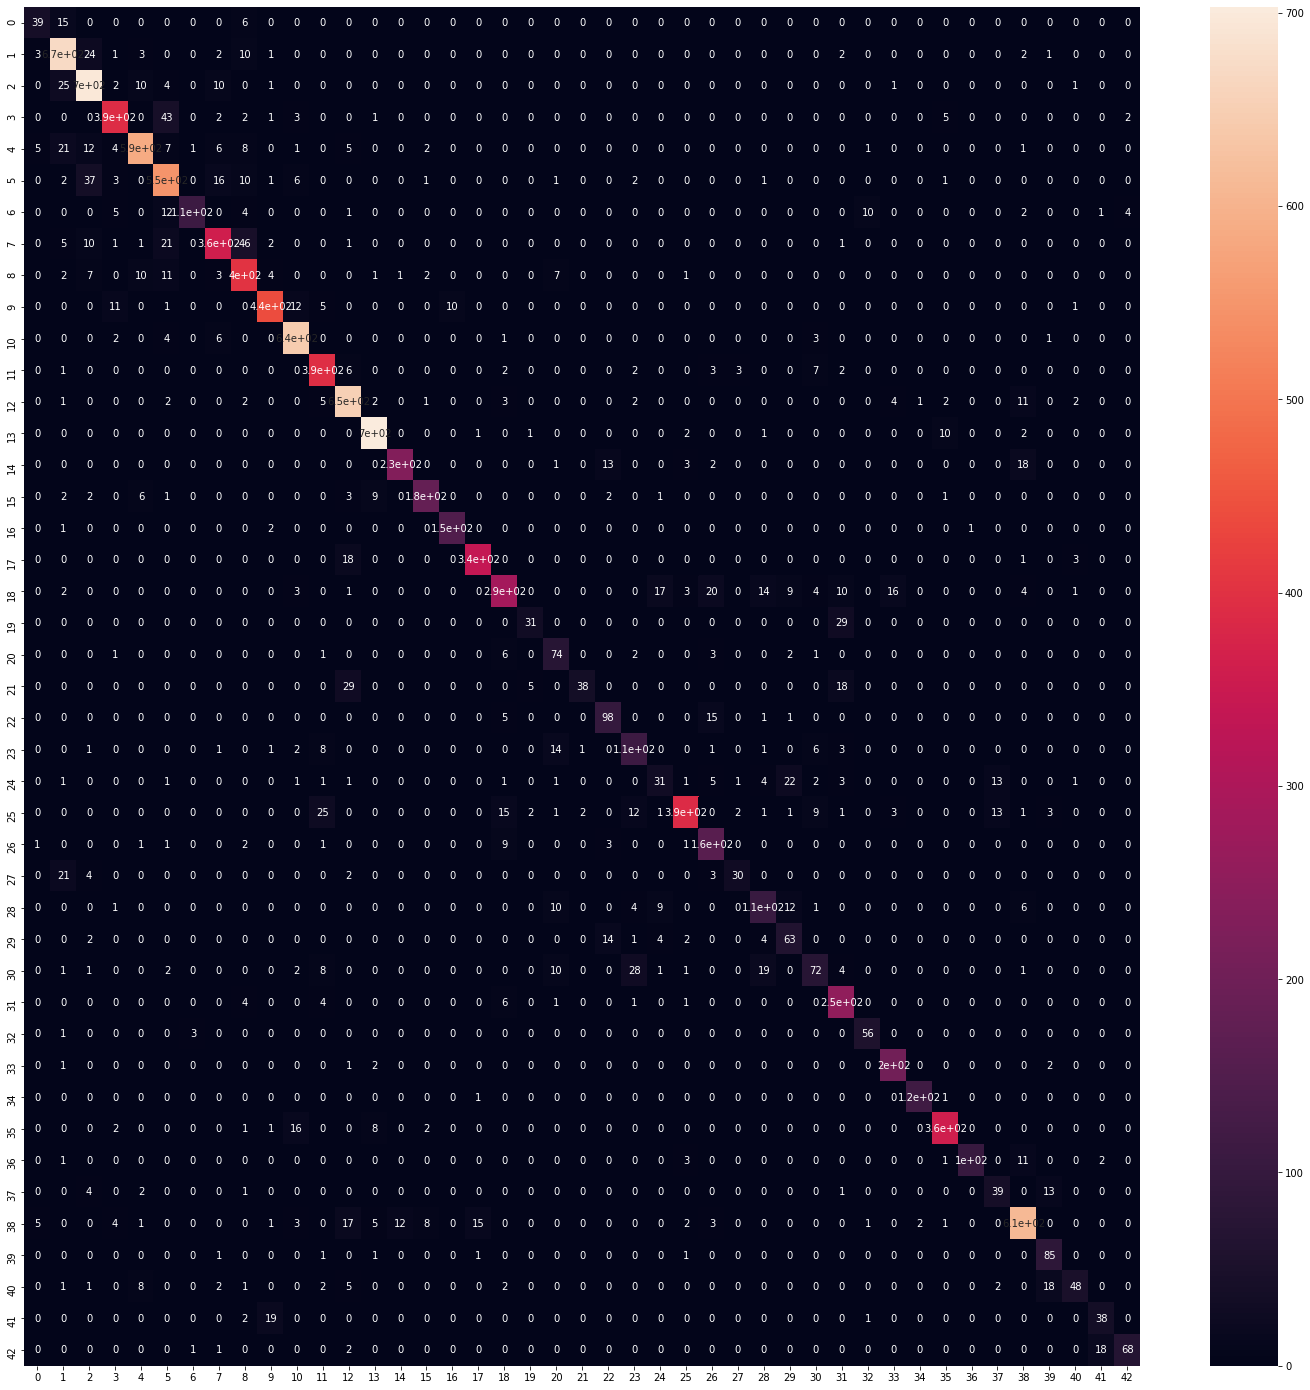

In [39]:
#Now, Plot the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true, prediction_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

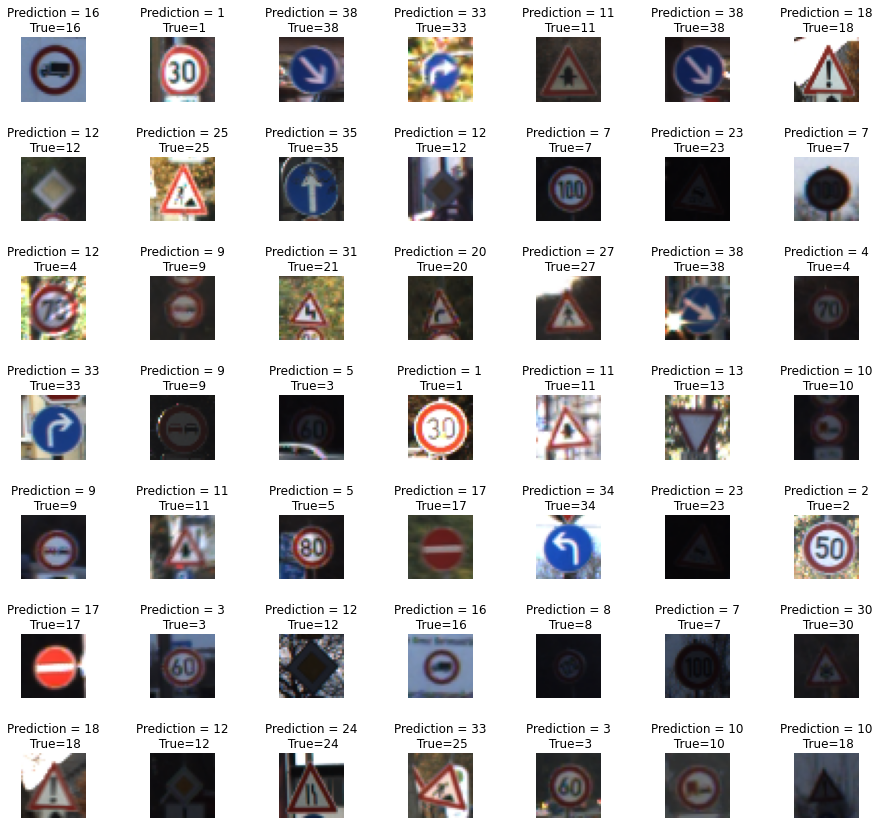

In [40]:
#We can improve the performance by using image augmentation Techniques. Prediction was 3 , however the true class was 5
#We can start generating our new data samples

L=7
W=7
fig, axes=plt.subplots(L,W,figsize=(15,15))
axes=axes.ravel()
for i in range(L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True={}'.format(prediction_classes[i],y_true[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=1)
#Dark images are there, making them difficult to be classified